# Chi-Square Distribution and Fitting

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px;">
توزیع گاوسی (نرمال) یکی از مهم‌ترین توزیع‌های احتمالی در فیزیک و آمار است.
<p style="font-family: 'B Nazanin'; font-size: 16px;">
 تابع چگالی احتمال آن به صورت زیر تعریف می‌شود

$ f(E; \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(E - \mu)^2}{2\sigma^2}\right) $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px;">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    E: متغیر مستقل (مثلاً انرژی)
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    μ: میانگین توزیع
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    σ: انحراف معیار توزیع
    <p style="font-family: 'B Nazanin'; font-size: 16px;">
    error:میزان نویز (اگر صفر باشد، نویز اضافه نمی‌شود)
<p style="font-family: 'B Nazanin'; font-size: 16px;">
خروجی:
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    آرایه‌ای از مقادیر توزیع گاوسی
<p style="font-family: 'B Nazanin'; font-size: 16px;">
در کد زیر، تابع gaussian برای محاسبه توزیع گاوسی تعریف شده است. این تابع همچنین قابلیت افزودن نویز به داده‌ها را دارد.

In [1]:
import numpy as np

def gaussian(E, mean, sigma, error):
    ret = np.exp(-(E - mean)**2 / (2 * sigma**2))
    
    if error != 0:
        errors = np.random.normal(0, error, E.shape)
        ret += ret * errors
    
    return ret

___
<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
تولید شبکه‌ای از داده‌ها

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
برای بررسی رفتار توزیع گاوسی در محدوده‌های مختلف پارامترها، از شبکه‌سازی (Meshgrid) استفاده می‌شود.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
 این روش به ما امکان می‌دهد تا تمام ترکیبات ممکن از پارامترها را بررسی کنیم.
در کد زیر، از تابع np.meshgrid برای ایجاد شبکه‌ای از مقادیر انرژی (E)، میانگین‌ها (means) و انحراف معیارها (sigmas) استفاده شده است.

In [2]:
E = np.linspace(-5, 5, 20)
means = np.linspace(-1, 1, 50)
sigmas = np.linspace(0.1, 2, 100)

E_, means_, sigmas_ = np.meshgrid(E, means, sigmas)
allYs = gaussian(E_, means_, sigmas_, 0)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    E_, means_, sigmas_: شبکه‌های سه‌بعدی از مقادیر انرژی، میانگین و انحراف معیار
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    allYs: مقادیر توزیع گاوسی برای تمام ترکیبات ممکن

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">

 تحلیل داده‌ها با استفاده از معیار Chi-squared

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
معیار Chi-squared (χ2) برای مقایسه داده‌های تجربی با مدل نظری استفاده می‌شود. این معیار به صورت زیر تعریف می‌شود:

$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    Oi​: داده‌های تجربی
<p style="font-family: 'B Nazanin'; font-size: 16px;">
    Ei​: داده‌های مدل نظری

In [3]:
data = gaussian(E, 0, 1, 0.1)
experiment_new = np.repeat(data[np.newaxis, :, np.newaxis], means.size, axis=0)
experiment_new = np.repeat(experiment_new, sigmas.size, axis=2)

chi2 = np.sum((experiment_new - allYs)**2, 1)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
برای نمایش نتایج، از نمودار دو بعدی با رنگ‌های لگاریتمی استفاده شده است

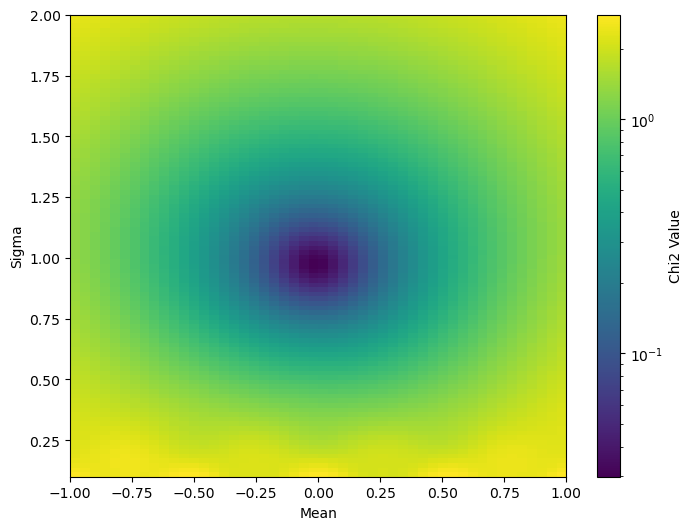

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


chi2[chi2 > 5] = 5
plt.figure(figsize=(8, 6))
plt.imshow(np.transpose(chi2), aspect='auto', origin='lower',
           extent=[means[0], means[-1], sigmas[0], sigmas[-1]],
           cmap='viridis', norm=LogNorm())
plt.colorbar(label='Chi2 Value')
plt.xlabel('Mean')
plt.ylabel('Sigma')
plt.show()

---
<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
توزیع کای‌دو (Chi-Square Distribution)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
توزیع کای‌دو یکی از توزیع‌های مهم در آمار است که معمولاً برای تحلیل داده‌ها و آزمون فرضیه‌ها استفاده می‌شود. این توزیع به‌خصوص در مواردی که با مجموع مربعات متغیرهای تصادفی سر و کار داریم، کاربرد دارد.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
اگر X1,X2,…,Xk​ متغیرهای تصادفی مستقل با توزیع نرمال استاندارد باشند، آنگاه مجموع مربعات آن‌ها:

$
Q = \sum_{i=1}^k X_i^2
$


In [5]:
k = 3
x = np.linspace(0, 20, 1000)

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 14px; ">
از توزیع کای‌دو با k درجه آزادی پیروی می‌کند. این توزیع با نماد χ2(k) نشان داده می‌شود.



<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
تابع چگالی احتمال (PDF):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تابع چگالی احتمال توزیع کای‌دو به صورت زیر تعریف می‌شود:
( Γ تابع گاما )

$ f(x; k) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2 - 1} e^{-x/2}, \quad x > 0$

In [6]:
from scipy.special import gamma
def chi2_pdf(x, k):

    return np.where(x <= 0, 0, (1 / (2 ** (k / 2) * gamma(k / 2)) * x ** (k / 2 - 1) * np.exp(-x / 2)))

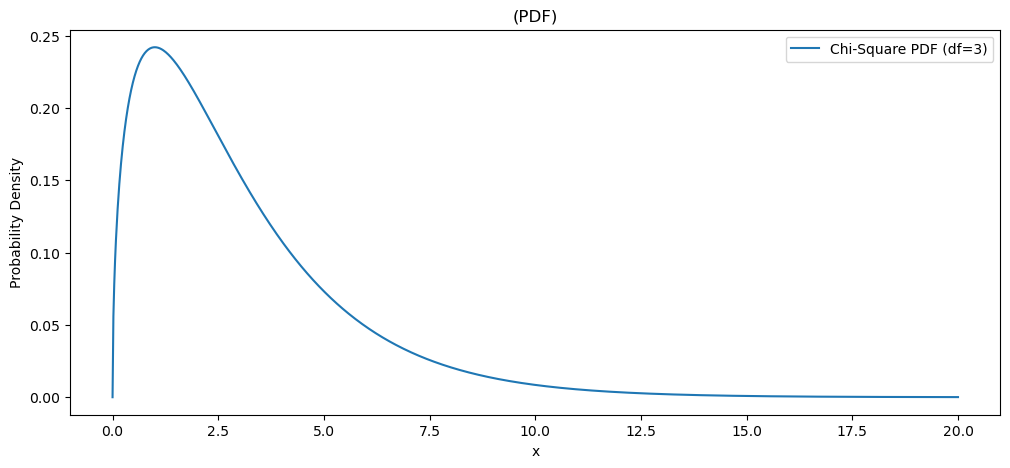

In [7]:
pdf = chi2_pdf(x, k)


plt.figure(figsize=(12, 5))
plt.plot(x, pdf, label=f'Chi-Square PDF (df={k})')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('(PDF)')
plt.legend()


plt.show()

___
<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 20px; ">
برازش  کردن داده‌ها (Data Fitting)
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
فیت کردن داده‌ها به معنای یافتن یک مدل ریاضی است که به بهترین شکل داده‌های مشاهده‌شده را توصیف کند. این مدل‌ها می‌توانند خطی، نمایی، یا هر شکل دیگری باشند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    هدف فیت کردن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
        یافتن پارامترهای مدل که بهترین تطابق را با داده‌ها دارند.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
        پیش‌بینی رفتار سیستم بر اساس مدل فیت شده.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    روش حداقل مربعات (Least Squares):
    در این روش، مجموع مربعات تفاوت بین داده‌های مشاهده‌شده و مقادیر پیش‌بینی‌شده توسط مدل کمینه می‌شود:

$ \chi^2 = \sum_{i=1}^N \frac{(y_i - f(x_i; \theta))^2}{\sigma_i^2} $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    yi​ داده‌های مشاهده‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    f(xi​;θ) مدل پیش‌بینی‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    σi​ خطای اندازه‌گیری داده‌ها،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    θ پارامترهای مدل است.

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
معیار کای‌دو (χ2) برای ارزیابی کیفیت برازش استفاده می‌شود. هرچه مقدار χ2 کوچک‌تر باشد، برازش بهتر است

درجه آزادی واقعی: 4, درجه آزادی برآوردشده: 3.41


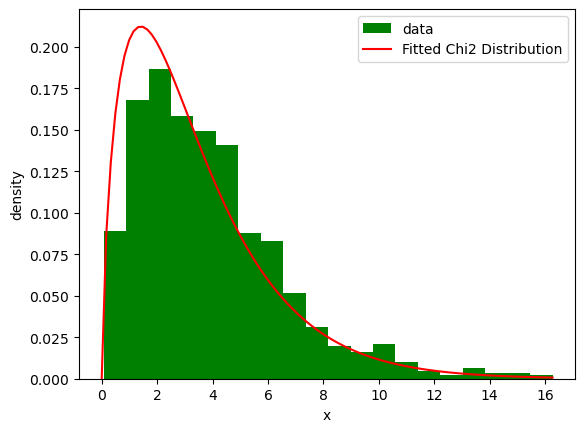

In [11]:
from scipy.optimize import minimize

np.random.seed(0)
k_true = 4
data = np.random.chisquare(k_true, 1000)

def chi2_error(params, data):

    k = params[0]


    expected = chi2_pdf(np.sort(data), k)
    observed, _ = np.histogram(data, bins=20, density=True)
    chi2_value = np.sum((observed - expected[:len(observed)]) ** 2 / expected[:len(observed)])
    return chi2_value




initial_guess = [2]


result = minimize(chi2_error, initial_guess, args=(data,))


estimated_k = result.x[0]


print(f"درجه آزادی واقعی: {k_true}, درجه آزادی برآوردشده: {estimated_k:.2f}")


plt.hist(data, bins=20, density=True, color='g', label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, chi2_pdf(x, estimated_k), 'r-', label='Fitted Chi2 Distribution')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()

___

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تابع درست‌نمایی (Likelihood Function)
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
تابع درست‌نمایی یکی از مفاهیم کلیدی در آمار است که برای یافتن بهترین پارامترهای مدل استفاده می‌شود.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    تابع درست‌نمایی، احتمال مشاهده داده‌ها را با توجه به پارامترهای مدل بیان می‌کند. برای داده‌های مستقل با توزیع نرمال، تابع درست‌نمایی به صورت زیر تعریف می‌شود:

$ \mathcal{L}(\theta) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma_i^2}} \exp\left(-\frac{(y_i - f(x_i; \theta))^2}{2\sigma_i^2}\right) $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
که در آن:
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    θ پارامترهای مدل،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    yi​ داده‌های مشاهده‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    f(xi​;θ) مدل پیش‌بینی‌شده،
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
    σi​ خطای اندازه‌گیری است.
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
روش بیشینه‌سازی درست‌نمایی (Maximum Likelihood Estimation - MLE):
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
در این روش، پارامترهای مدل (θ) به گونه‌ای انتخاب می‌شوند که تابع درست‌نمایی بیشینه شود. معمولاً برای سادگی، از لگاریتم تابع درست‌نمایی (Log-Likelihood) استفاده می‌کنیم:


$ \ln \mathcal{L}(\theta) = -\frac{1}{2} \sum_{i=1}^N \left[\frac{(y_i - f(x_i; \theta))^2}{\sigma_i^2} + \ln(2\pi\sigma_i^2)\right] $

<div dir="rtl">
<p style="font-family: 'B Nazanin'; font-size: 16px; ">
بیشینه‌سازی این تابع معادل کمینه‌سازی معیار کای‌دو (χ2) است

d:\conda\envs\cgcnn\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
d:\conda\envs\cgcnn\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


lambda واقعی: 0.5, lambda برآوردشده: 0.54


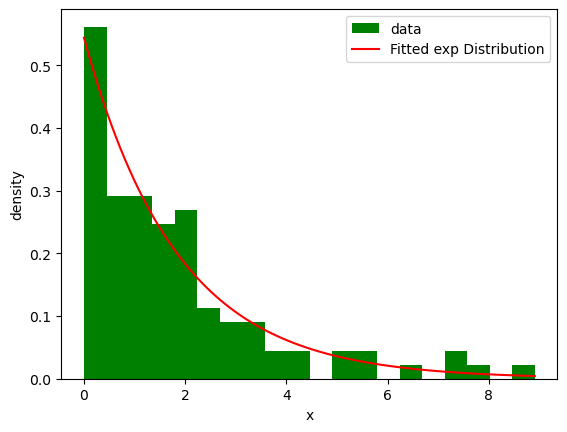

In [10]:
from scipy.stats import expon

np.random.seed(0)
lambda_true = 0.5
data = np.random.exponential(scale=1/lambda_true, size=100)



def negative_log_likelihood(params, data):
    lambda_ = params[0]

    if lambda_ <= 0:
        return np.inf

    log_likelihood = np.sum(expon.logpdf(data, scale=1/lambda_))
    return -log_likelihood


initial_guess = [5]


result = minimize(negative_log_likelihood, initial_guess, args=(data,))

estimated_lambda = result.x[0]
 
print(f"lambda واقعی: {lambda_true}, lambda برآوردشده: {estimated_lambda:.2f}")

plt.hist(data, bins=20, density=True, color='g', label='data')
x = np.linspace(0, max(data), 100)
plt.plot(x, expon.pdf(x, scale=1/estimated_lambda), 'r-', label='Fitted exp Distribution')
plt.xlabel('x')
plt.ylabel('density')
plt.legend()
plt.show()